# Planning Stage: Data Description & Exploratory Data Analysis and Visualization (individual assignment 1)

In [1]:
library(tidyverse)
library(dplyr)
library(GGally)
library(cowplot)
library(car)
library(rsample)
library(broom)
library(pROC)
library(yardstick)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some


Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are ma

In [2]:
employee <- read_csv("Employee.csv") |> 
    drop_na() |>
    mutate(PaymentTier = as.character(PaymentTier))
head(employee)

Rows: 4653 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): Education, City, Gender, EverBenched
dbl (5): JoiningYear, PaymentTier, Age, ExperienceInCurrentDomain, LeaveOrNot

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
Bachelors,2017,Bangalore,3,34,Male,No,0,0
Bachelors,2013,Pune,1,28,Female,No,3,1
Bachelors,2014,New Delhi,3,38,Female,No,2,0
Masters,2016,Bangalore,3,27,Male,No,5,1
Masters,2017,Pune,3,24,Male,Yes,2,1
Bachelors,2016,Bangalore,3,22,Male,No,0,0


In [3]:
summary(employee)

  Education          JoiningYear       City           PaymentTier       
 Length:4653        Min.   :2012   Length:4653        Length:4653       
 Class :character   1st Qu.:2013   Class :character   Class :character  
 Mode  :character   Median :2015   Mode  :character   Mode  :character  
                    Mean   :2015                                        
                    3rd Qu.:2017                                        
                    Max.   :2018                                        
      Age           Gender          EverBenched       
 Min.   :22.00   Length:4653        Length:4653       
 1st Qu.:26.00   Class :character   Class :character  
 Median :28.00   Mode  :character   Mode  :character  
 Mean   :29.39                                        
 3rd Qu.:32.00                                        
 Max.   :41.00                                        
 ExperienceInCurrentDomain   LeaveOrNot    
 Min.   :0.000             Min.   :0.0000  
 1st Qu.:2.000  

## Data Description:

The dataset for this project was obtained from https://www.kaggle.com/datasets/tawfikelmetwally/employee-dataset?resource=download. 

This dataset contains information about employees in a company with 4653 observations and 9 variables.
1. **Education**(categorical): The educational qualifications of employees, including degree, institution, and field of study.
2. **JoiningYear**(categorical): The year each employee joined the company, indicating their length of service.
3. **City**(categorical): The location or city where each employee is based or works.
4. **PaymentTier**(categorical): Categorization of employees into different salary tiers.
5. **Age**(numeric): The age of each employee, providing demographic insights.
6. **Gender**(categorical): Gender identity of employees, promoting diversity analysis.
7. **EverBenched**(categorical): Indicates if an employee has ever been temporarily without assigned work.
8. **ExperienceInCurrentDomain**(numeric): The number of years of experience employees have in their current field.
9. **LeaveOrNot**(categorical): Binary show the employee whether leave or not.

This dataset can be used for various HR and workforce-related analyses, including employee retention, salary structure assessments, diversity and inclusion studies, and leave pattern analyses. Researchers, data analysts, and HR professionals can gain valuable insights from this dataset.

## Question:

**Does leave or not depend on the education level, joining year, and payment tier?**

In this question, the **response variable** (variable of interest) is "LeaveOrNot" (binary: 1 = left the company, 0 = stayed). The **explanatory variables** could include "Education", "JoiningYear", and "PaymentTier".

The data will help address this question by allowing us to analyze patterns and correlations between these explanatory variables and the likelihood of an employee leaving. By examining these relationships, we can identify significant predictors of employee turnover and understand which factors are associated with higher retention or turnover rates. This question is focused more on inference

## Exploratory Data Analysis and Visualization

Warning message:
“The following aesthetics were dropped during statistical transformation: fill.
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”
Warning message:
“The following aesthetics were dropped during statistical transformation: fill.
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”
Warning message:
“The following aesthetics were dropped during statistical transformation: fill.
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”


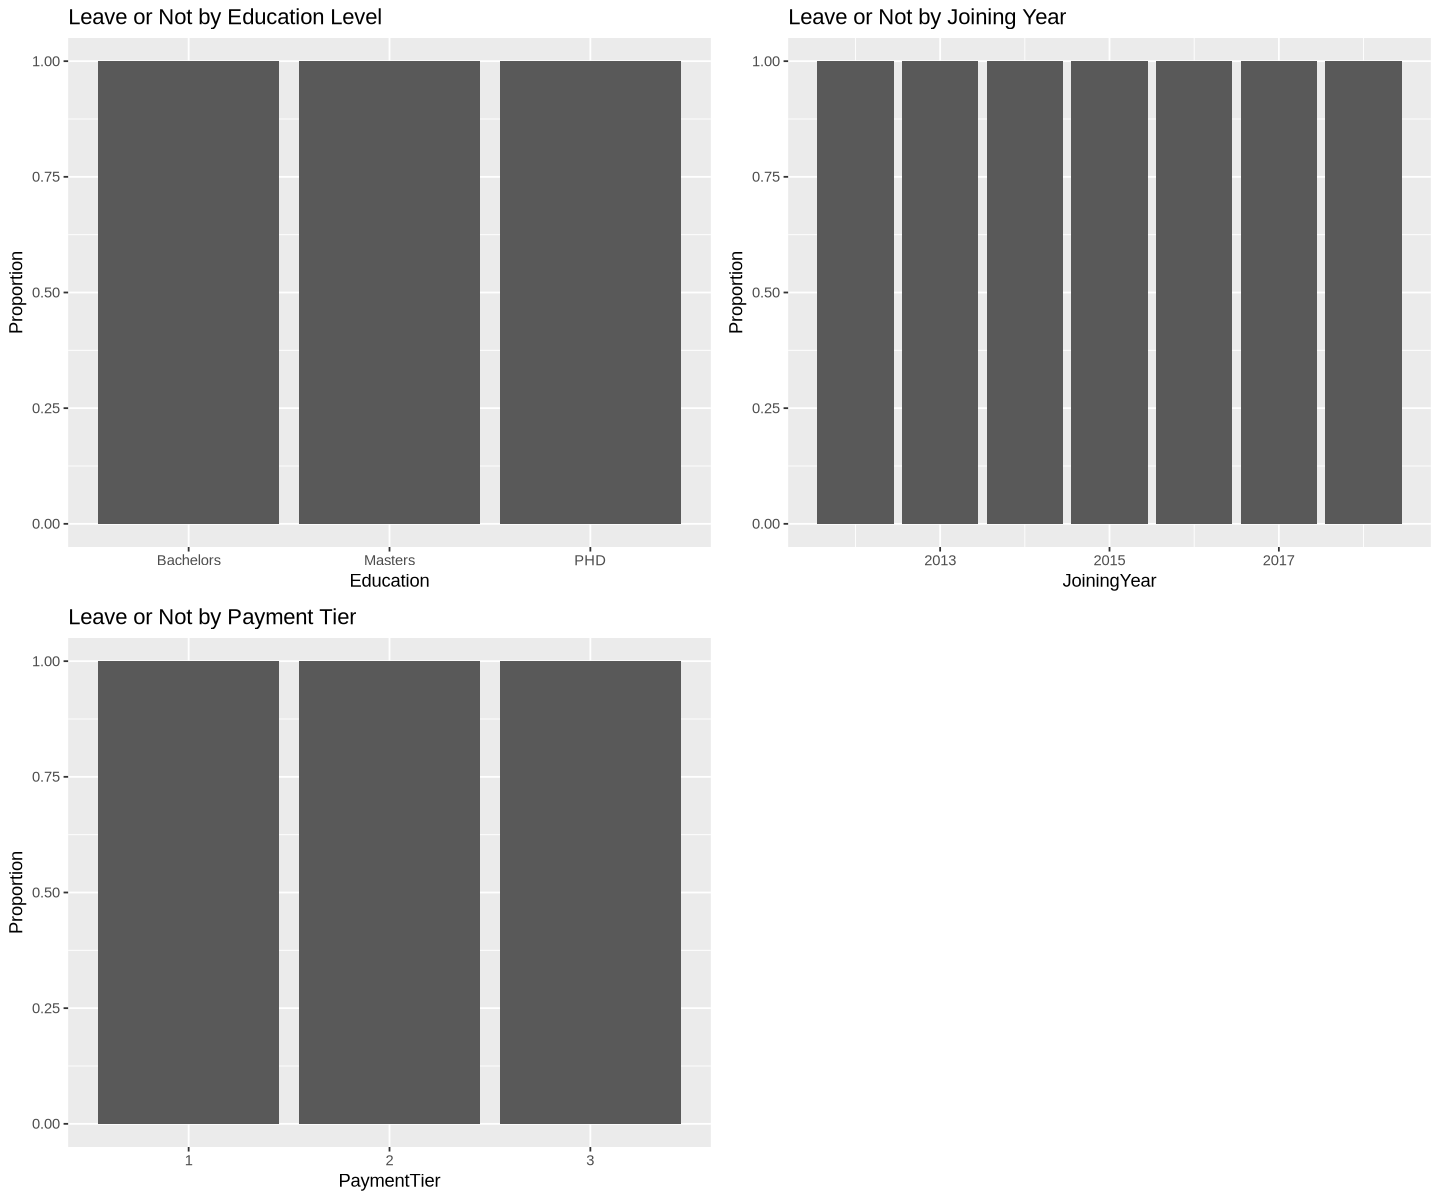

In [4]:
education_barChart <-  
    ggplot(employee, aes(x = Education, fill = LeaveOrNot)) +
    geom_bar(position = "fill") +
    labs(y = "Proportion", title = "Leave or Not by Education Level")
joiningYear_barChart <-  
    ggplot(employee, aes(x = JoiningYear, fill = LeaveOrNot)) +
    geom_bar(position = "fill") +
    labs(y = "Proportion", title = "Leave or Not by Joining Year")
paymentTier_barChart <-  
    ggplot(employee, aes(x = PaymentTier, fill = LeaveOrNot)) +
    geom_bar(position = "fill") +
    labs(y = "Proportion", title = "Leave or Not by Payment Tier")
# put plot together
options(repr.plot.width = 12, repr.plot.height = 10)
plot_grid(education_barChart, joiningYear_barChart, paymentTier_barChart)

- Education Level Plot: This plot helps us observe the turnover rate by education level. We can see differences in the proportions of employees who leave across Bachelors, Masters, and PhD holders. This allows us to explore if higher or lower education levels are associated with a higher likelihood of leaving.

- Joining Year Plot: By looking at turnover by JoiningYear, we can assess if employees who joined in certain years are more likely to leave. This may reveal trends in employee retention over time.

- Payment Tier Plot: The plot for PaymentTier shows the proportion of employees leaving at different payment levels. This is relevant because it allows us to investigate whether compensation level correlates with retention, revealing if employees of different payment tier are more likely to stay or leave.

These plots are relevant because they give a visual overview of potential relationships between each categorical variable and LeaveOrNot. Such trends are crucial for identifying patterns and developing hypotheses about factors influencing employee turnover.

## Method

## Implementation of a proposed model

In [5]:
MLR_employee <- glm(formula = LeaveOrNot ~ ., 
                data = employee, 
                family = binomial)
VIF_MLR_employee <- vif(MLR_employee)
round(VIF_MLR_employee, 3)

,GVIF,Df,GVIF^(1/(2*Df))
Education,1.331,2,1.074
JoiningYear,1.071,1,1.035
City,1.541,2,1.114
PaymentTier,1.299,2,1.068
Age,1.025,1,1.013
Gender,1.104,1,1.051
EverBenched,1.012,1,1.006
ExperienceInCurrentDomain,1.023,1,1.011


- None of the variables have $GVIF^{\frac{1}{2*Df}}$ values above $2$. All values are close to $1$, indicating low multicollinearity.
- The highest GVIF is $1.423$ for the variable "City". However, the adjusted $GVIF^{\frac{1}{2*Df}}$ value for 'City' is $1.092$, which is well below the threshold of 2.
 
In conclusion, no variables need to be removed for multicollinearity based on this analysis.

In [6]:
set.seed(1234)
# split the data into train and test set
employee_split <- 
    employee %>%
    initial_split(prop = 0.7, strata = LeaveOrNot)

training_employee <- training(employee_split)
testing_employee <- testing(employee_split)

head(training_employee)
nrow(training_employee)

Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
Bachelors,2014,New Delhi,3,38,Female,No,2,0
Bachelors,2015,New Delhi,3,38,Male,No,0,0
Bachelors,2016,Pune,3,23,Male,No,1,0
Masters,2017,New Delhi,2,37,Male,No,2,0
Bachelors,2016,Pune,3,34,Male,No,3,0
Bachelors,2016,Bangalore,3,39,Male,No,2,0


[1] 3257

In [7]:
# Initial (null) model with no predictors
null_model <- glm(LeaveOrNot ~ 1, data = training_employee, family = binomial)

# Full model with all predictors
full_model <- glm(LeaveOrNot ~ ., data = training_employee, family = binomial)

# Forward selection using AIC
employee_forward_sel <- step(null_model, 
                             scope = formula(full_model), 
                             direction = "both")
# summary
employee_forward_sel_summary <- summary(employee_forward_sel)

Start:  AIC=4194.23
LeaveOrNot ~ 1

                            Df Deviance    AIC
+ PaymentTier                2   3946.1 3952.1
+ Gender                     1   4046.0 4050.0
+ City                       2   4045.0 4051.0
+ JoiningYear                1   4093.0 4097.0
+ Education                  2   4121.9 4127.9
+ EverBenched                1   4176.8 4180.8
+ Age                        1   4181.4 4185.4
+ ExperienceInCurrentDomain  1   4187.8 4191.8
<none>                           4192.2 4194.2

Step:  AIC=3952.15
LeaveOrNot ~ PaymentTier

                            Df Deviance    AIC
+ Gender                     1   3876.8 3884.8
+ City                       2   3880.6 3890.6
+ JoiningYear                1   3890.0 3898.0
+ Education                  2   3921.8 3931.8
+ EverBenched                1   3930.8 3938.8
+ Age                        1   3934.7 3942.7
+ ExperienceInCurrentDomain  1   3942.8 3950.8
<none>                           3946.1 3952.1
- PaymentTier            

In [8]:
AIC_min <- which.min(employee_forward_sel_summary$deviance)
selected_var <- names(coef(employee_forward_sel, AIC_min))[-1]
selected_var

[1] "PaymentTier2"              "PaymentTier3"             
 [3] "GenderMale"                "CityNew Delhi"            
 [5] "CityPune"                  "JoiningYear"              
 [7] "EducationMasters"          "EducationPHD"             
 [9] "Age"                       "EverBenchedYes"           
[11] "ExperienceInCurrentDomain"

In [12]:
# generate model
employee_log_model <- glm(LeaveOrNot ~., 
                         data = training_employee,
                         family = binomial
                         )
summary(employee_log_model)


Call:
glm(formula = LeaveOrNot ~ ., family = binomial, data = training_employee)

Coefficients:
                            Estimate Std. Error z value Pr(>|z|)    
(Intercept)               -3.691e+02  4.601e+01  -8.022 1.04e-15 ***
EducationMasters           7.548e-01  1.152e-01   6.551 5.72e-11 ***
EducationPHD              -1.362e-02  2.355e-01  -0.058 0.953897    
JoiningYear                1.835e-01  2.284e-02   8.037 9.24e-16 ***
CityNew Delhi             -7.679e-01  1.202e-01  -6.386 1.70e-10 ***
CityPune                   5.280e-01  1.027e-01   5.140 2.75e-07 ***
PaymentTier2               7.394e-01  1.964e-01   3.764 0.000167 ***
PaymentTier3              -1.369e-01  1.809e-01  -0.757 0.449141    
Age                       -3.322e-02  8.604e-03  -3.861 0.000113 ***
GenderMale                -8.662e-01  8.525e-02 -10.162  < 2e-16 ***
EverBenchedYes             4.866e-01  1.323e-01   3.678 0.000235 ***
ExperienceInCurrentDomain -6.505e-02  2.649e-02  -2.456 0.014044 *  
---
Si

In [14]:
# Using model to predict 
predict_model <- predict(employee_log_model, newdata = testing_employee, type = "response")
predicted_classes <- ifelse(predict_model > 0.5, 0, 1)

In [16]:
Leave_models <- tibble(
  Model = "Logistic Forward Selection",
  
  # AUC
  AUC = roc(testing_employee$LeaveOrNot, predict_model)$auc
)

# Display the evaluation
Leave_models

Setting levels: control = 0, case = 1

Setting direction: controls < cases



Model,AUC
<chr>,<auc>
Logistic Forward Selection,0.7357885
